## Analiza najpomembnejših tritedenskih dirk v kolesarstvu ##

V tej datoteki se lotimo analize treh najpomembnejših dirk v kolesarstvu. To so Giro d'Italia (dirka po Italiji), Tour de France (dirka po Franciji) in Vuelta a España (dirka po Španiji). V analizi se posvetimo predvsem analizi karakteristik posameznih dirk. V prvem delu analize je veliko govora o klasičnih lastnostih dirk (dolžina etape, višinski metri, ...). V drugem delu analize pa se posvetimo vzponom.

Sprva si pripravimo knjižnice za analizo.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
plt.style.use("style.mplstyle")

markers_iter = ["d", "s", "*", "o", "^"]

data_frame_stages = pd.read_csv("../data/csv/stages.csv")

rest_day_filter = data_frame_stages["Stage type"] != -1

legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', marker="None", label='Maksimalna vrednost'),
    Line2D([0], [0], color='black', linestyle='-', marker="None", label='Povprečna vrednost')
]

data_frame_stages.sort_values("Vertical", ascending=False).head(5)


,Number,Date,Distance,Average Speed,Vertical,Profile score,Stage type,Year,Race
6256,15,18 July 1992,254.5,32.850,6974.0,608.0,5,1992,tour-de-france
2139,16,22 May 2011,229.0,30.722,6939.0,474.0,5,2011,giro-d-italia
5784,15,09 July 1974,199.0,28.730,6659.0,439.0,4,1974,tour-de-france
6036,20,20 July 1983,247.5,31.910,6589.0,572.0,4,1983,tour-de-france
5753,13,09 July 1973,237.5,29.950,6500.0,532.0,5,1973,tour-de-france


Analizo bomo začeli s prikazom številom etap skozi leta. Ko so se dirke na začetku 20. stoletja pričele, so bila etape izjemno dolge, zato je bilo število etap majhno. Pričakovalo se je, da bodo kolesarji za določene etape porabili celo več dni. V 70. letih prejšnega stoletja je bilo etap več, a so bile zato malo krajše in manj zahtevne. Zanima nas torej število etap glede na leto, seveda pa tudi porazdelitev števila etap glede na posamezno dirko.

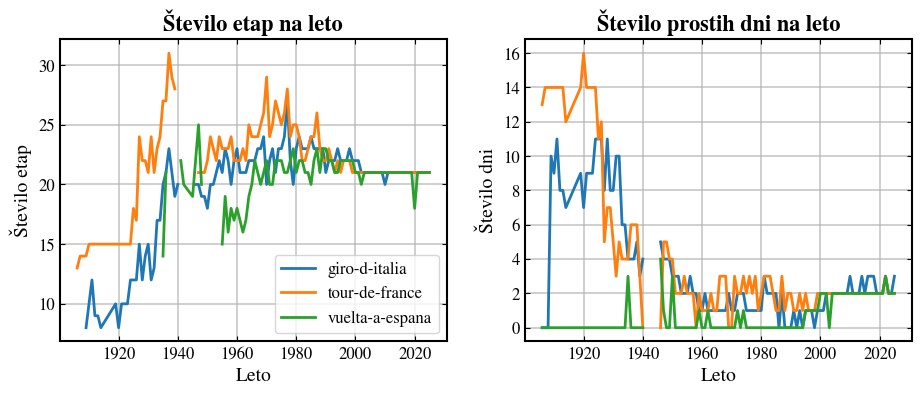

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

graph_stages_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"]).size()
graph_rest_days_by_year = data_frame_stages[~rest_day_filter].groupby(["Race", "Year"]).size()

count_table = graph_stages_by_year.unstack(fill_value=None) 

count_rest_days_table = graph_rest_days_by_year.unstack(fill_value=0) 
count_rest_days_table = count_rest_days_table.reindex(columns=count_table.columns, fill_value=None)

for i, race in enumerate(count_table.index):
    ax[0].plot(count_table.columns, count_table.loc[race], label=f"{race}", marker="None")
    ax[1].plot(count_rest_days_table.columns, count_rest_days_table.loc[race], label=f"{race}", marker="None")
ax[0].set_title("Število etap na leto")
ax[0].set_ylabel("Število etap")
ax[1].set_ylabel("Število dni")

ax[0].legend()
ax[1].set_title("Število prostih dni na leto")

for i in range(0, 2):
    ax[i].set_xlabel("Leto")

plt.show()

Na začetku 20. stoletja je bilo etap res nekoliko manj. Opazimo tudi, da je bilo prostih dni veliko več. Največ etap je bilo v 30ih letih prejšnjega stoletja, obenem pa je bilo takrat tudi največ prostih dni. Število etap je v 70ih letih, kot že omenjeno, res visoko, zanimivo pa je dejstvo, da je bilo enako število prostih dni, kot jih je danes. Smiselno bi bilo pogledati, če so etape zato nekoliko krajše. 

Nobenega presenečenja ni, da dirke po Franciji in Italiji ni bilo med letoma 1940-1945, dirke po Španiji pa med letoma 1936 in 1940. To je bila posledica svetovne in državljanske vojne. Na grafu opazimo, da se dirka po Španiji ni izvajala tudi med letoma 1950 in 1955. Razlogov za to je bilo več, glavni vzrok pa pa so bile povojne ekonomske težave ([vir](https://pezcyclingnews.com/vuelta06/la-vueltas-colorful-history/)).

Poglejmo si torej povprečno in maksimalno dolžino etap.

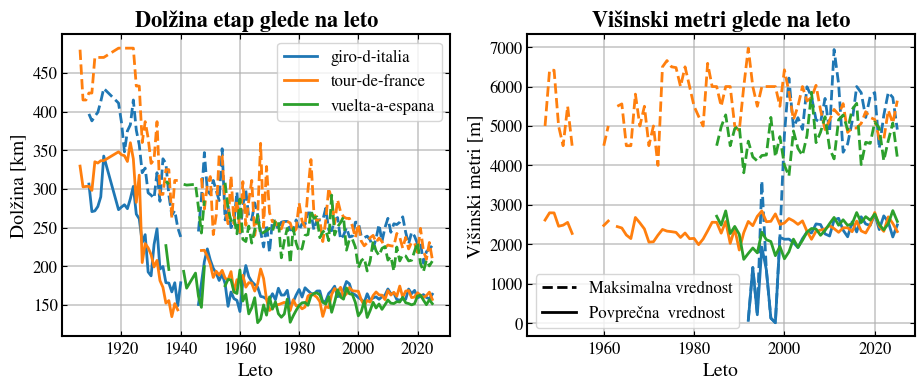

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

graph_distance_mean_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Distance"].mean().unstack(fill_value=None) 
graph_distance_max_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Distance"].max().unstack(fill_value=None) 

graph_vertical_mean_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Vertical"].mean().unstack(fill_value=None) 
graph_vertical_max_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Vertical"].max().unstack(fill_value=None) 




for i, race in enumerate(graph_distance_mean_by_year.index):
    p1 = ax[0].plot(graph_distance_mean_by_year.columns, graph_distance_mean_by_year.loc[race], label=f"{race}", marker="None")
    ax[0].plot(graph_distance_max_by_year.columns, graph_distance_max_by_year.loc[race], linestyle="--", color=p1[0].get_color(), marker="None")
    ax[1].plot(graph_vertical_mean_by_year.columns, graph_vertical_mean_by_year.loc[race], label=f"{race}", marker="None")
    ax[1].plot(graph_vertical_max_by_year.columns, graph_vertical_max_by_year.loc[race], linestyle="--", color=p1[0].get_color(), marker="None")

ax[0].set_xlabel("Leto")
ax[0].set_ylabel("Dolžina [km]")
ax[0].set_title("Dolžina etap glede na leto")


ax[1].set_xlabel("Leto")
ax[1].set_ylabel("Višinski metri [m]")
ax[1].set_title("Višinski metri glede na leto")

ax[0].legend()
ax[1].legend(handles=legend_elements)


Kljub temu da je bilo v 70ih letih etap največ, so tako po dolžine kot po premagani nadmorski višini etape približno enake kot danes. To tudi spodbije tezo, da je bilo etap več, ker so bile enostavno krajše.

Dirka po Španiji ima v povprečju krajše etape kot dirka po Italiji in dirka po Franciji. V zadnjem obdobju (po leto 2000) ima dirka po Italiji najdaljše etape, medtem ko je imela drika po Franciji najdaljše etape v 20. stoletju. 

Prav tako imajo v zadnjem obdobju dirke zelo primerljivo število višinskih metrov, ki jih morajo kolesarji premagati. Histročno (kjer so podatki) pa opazimo, da so najtežje etape danes, po višniskih metrih, lažje kot so bile 50 let nazaj. 

Zanimivo bi bilo pogledati, kako se glede na ugotovljene lastnosti spreminja povprečna hitrost.

Text(0.5, 1.0, 'Povprečna hitrost zmagovalca v odivnosti od leta')

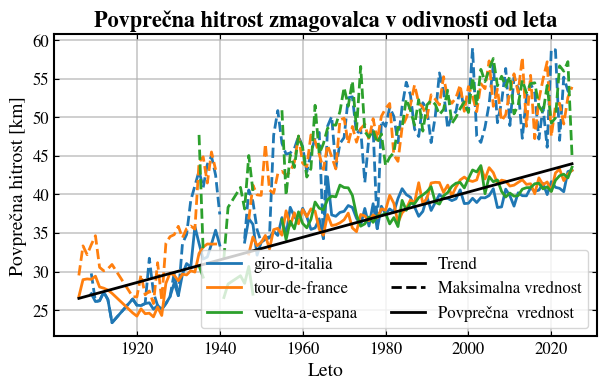

In [29]:
graph_speed_mean_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Average Speed"].mean().unstack(fill_value=None) 
graph_speed_max_by_year = data_frame_stages[rest_day_filter].groupby(["Race", "Year"])["Average Speed"].max().unstack(fill_value=None) 


for i, race in enumerate(graph_speed_mean_by_year.index):
    p1 = plt.plot(graph_speed_mean_by_year.columns, graph_speed_mean_by_year.loc[race], label=f"{race}", marker="None")
    plt.plot(graph_speed_max_by_year.columns, graph_speed_max_by_year.loc[race], linestyle="--", color=p1[0].get_color(), marker="None")


graph_speed_all_mean_by_year = data_frame_stages[rest_day_filter].groupby("Year")["Average Speed"].mean()

x = graph_speed_all_mean_by_year.index

y = graph_speed_all_mean_by_year.values


coefficients = np.polyfit(x, y, 1)  
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

plt.plot(x_fit, y_fit, marker="none", color="black", label="Trend")
plt.legend()

plt.xlabel("Leto")
plt.ylabel("Povprečna hitrost [km]")

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles + legend_elements, ncol=2)

plt.title("Povprečna hitrost zmagovalca v odivnosti od leta")


Opazimo, da povprečna hitrost narašča po letih. To je posledica napredka v tehnologiji. Na začetku 21. stoletja je bila hitrost na dirki po Franciji in Španiji največja. Vzrok za to je verjetno, da je tisto desetletje znano kot desetletje dopinga ([vir](https://pure.au.dk/portal/en/publications/))

Poglejmo si, katere etape so bile zgodovinski najdaljše in v katerih so kolesarji premagali največjo nadmorsko višino. 

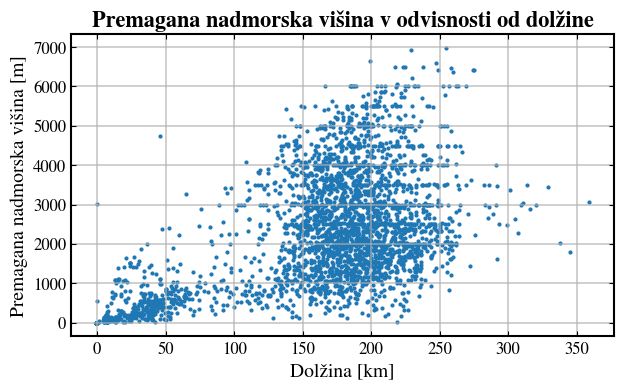

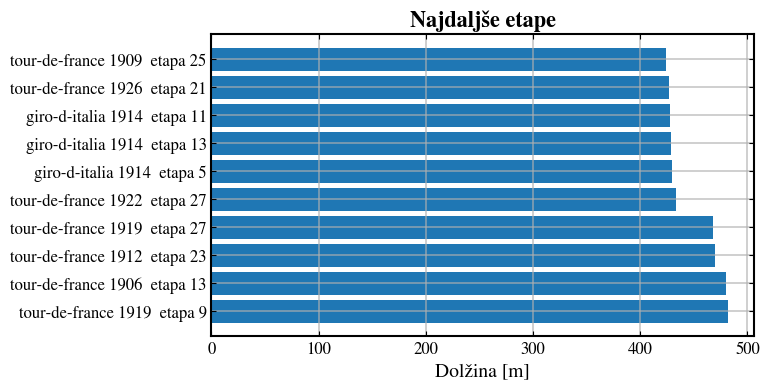

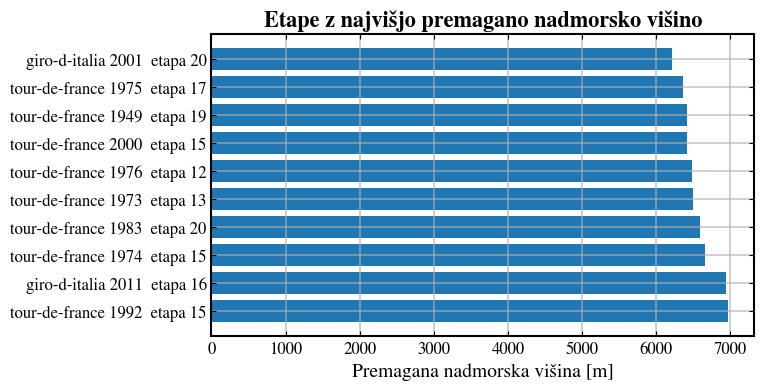

In [ ]:


plt.scatter(data_frame_stages["Distance"], data_frame_stages["Vertical"], s=4)
plt.xlabel("Dolžina [km]")
plt.ylabel("Premagana nadmorska višina [m]")
plt.title("Premagana nadmorska višina v odvisnosti od dolžine")


sorted_vertical = data_frame_stages.sort_values("Vertical", ascending=False).head(10)

plt.show()

# Najdaljše etape so si tako podobne, da lahko duplikate po dolžini kar izbiršemo (BŠS).
sorted_distance = data_frame_stages.sort_values("Distance", ascending=False).drop_duplicates(subset="Distance").head(10)

x_list = range(len(sorted_distance))

plt.barh(x_list, sorted_distance["Distance"], height=0.8)

plt.yticks(x_list, [ f"{sorted_distance.iloc[x]['Race']} {sorted_distance.iloc[x]['Year']}  dan {sorted_distance.iloc[x]['Number']}" for x in x_list])
plt.title("Najdaljše etape")
plt.xlabel("Dolžina [m]")
plt.show()


sorted_length = data_frame_stages.sort_values("Vertical", ascending=False).drop_duplicates(subset="Vertical").head(10)

x_list = range(len(sorted_length))

plt.barh(x_list, sorted_length["Vertical"], height=0.8)

plt.xlabel("Premagana nadmorska višina [m]")
plt.title("Etape z najvišjo premagano nadmorsko višino")

plt.yticks(x_list, [ f"{sorted_length.iloc[x]['Race']} {sorted_length.iloc[x]['Year']}  dan {sorted_length.iloc[x]['Number']}" for x in x_list])
plt.show()



Obstaja majhna korelacija med dolžino in premagano nadmorsko višino. To ni presenečenje, saj so gorske etape ponavadi daljše. Za vsako gorsko etapo pa imamo tudi podobno dolgo ravninsko etapo, zato korelacija ni tako velika.

Najdaljše etape so bile na dirki po Franciji na začetku 20. stoletja, to smo že opazili. Morda pa je bolj zanimivo dejstvo, da so skoraj vse etape, kjer so kolesarji premagali največjo nadmorsko višino, tudi na dirki po Franciji. Najdaljša od teh je bila 13 etapa (dan 15) na dirki po Franciji leta 1992.

Do sedaj smo za težavnost etap uporabljali predvsem razdaljo in premagano nadmorsko višino. Ti metriki pa zagotovo nista dobri pokazateljici dejanske težavnosti etape. Pri procyclingstats (PCS) so zato razvili [Profile score](https://www.procyclingstats.com/info/profile-score-explained). Ta matrika predpostavi, da so težje etape tiste, ki imajo več težjih vzponov. Na hitro bomo predstavili to metriko. Naj bosta $L_i$ in $G_i$, za vsak $i=1, \dots, N$, dolžina in naklon posameznega vzpona na dirki. Tukaj predpostavimo, da je naklon podan v odstotkih, dolžina pa v kilometrih. Za vsak naklon določimo še faktor $α_i$, ki je odvisen od razdalje vznožja naklona do cilja. Faktor je zapisan v naslednji tabeli
| Razdalja do vznožja    | $\alpha$ |
| -------- | ------- |
| 10 km  | 1    |
| 25 km | 0.8     |
| 50 km    | 0.6    |
| 75 km    | 0.4    |
| več kot 75 km    | 0.2    |

Profile score sedaj izračunamo po formuli $S = \sum_{i=1}^N \alpha_i L_i G_i$.

Da dobimo občutek, kako se ta metrika obnaša, si najprej poglejmo kako je ta metrika odvisna od dolžine etape, višinskih metrov.


Text(0.5, 1.0, 'Profile score v odvisnosti od nadmorske višine')

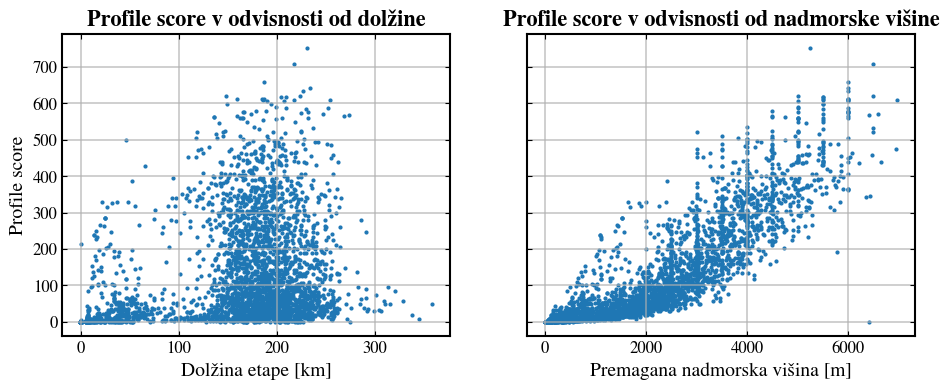

In [216]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)


ax[0].scatter(data_frame_stages["Distance"], data_frame_stages["Profile score"], s=4)
ax[1].scatter(data_frame_stages["Vertical"], data_frame_stages["Profile score"], s=4)

ax[0].set_xlabel("Dolžina etape [km]")
ax[1].set_xlabel("Premagana nadmorska višina [m]")

ax[0].set_ylabel("Profile score")


ax[0].set_title("Profile score v odvisnosti od dolžine")
ax[1].set_title("Profile score v odvisnosti od nadmorske višine")


Opazimo, da neke smiselne korelacije med dolžino in Profile Score metriko ni. Korelacija med nadmorsko višino in Profile score metriko pa je očitna, kar se opazi tudi iz formule.

Poglejmo si še odvisnost povprečne hitrosti od Profile score metrike.

Text(0.5, 0, 'Profile score')

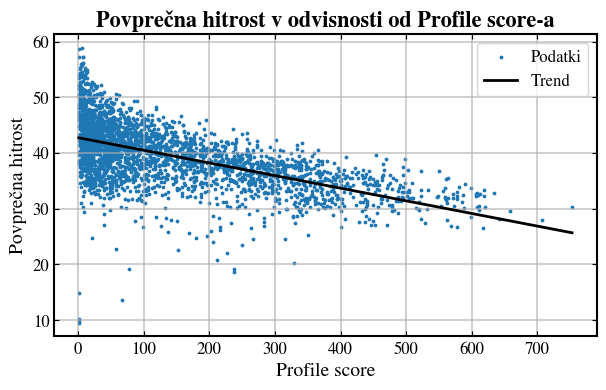

In [217]:
data_frame_stages_profile_score = data_frame_stages[(data_frame_stages["Profile score"] > 0) & (data_frame_stages["Average Speed"] > 0)]

x = data_frame_stages_profile_score["Profile score"]
y = data_frame_stages_profile_score["Average Speed"]

plt.scatter(x, y, s=3, label="Podatki")

coefficients = np.polyfit(x, y, 1)  
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(min(x), max(x), 100)
y_fit = polynomial(x_fit)

plt.plot(x_fit, y_fit, marker="none", color="black", label="Trend")
plt.legend()

plt.title("Povprečna hitrost v odvisnosti od Profile score-a")

plt.ylabel("Povprečna hitrost")
plt.xlabel("Profile score")


Opazimo močno negativno korelacijo med povprečno hitrostjo in Profile score metriko. To tudi pričakujem, ker visok Profile score implicira gorsko etapo, kjer je hitrost počasnejša, saj morajo kolesarji premagati več hribov ali gor.

Nadaljujmo s pregledom povprečne težavnost etap po Profile score metriki.


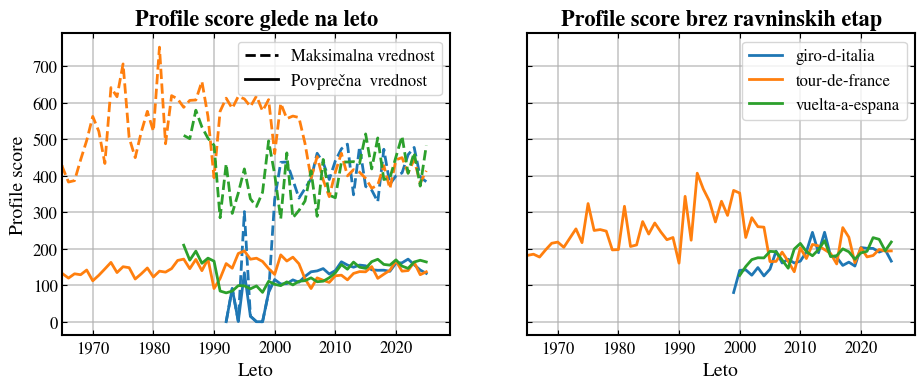

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4), sharey=True)

graph_pcs_mean_by_year = data_frame_stages[data_frame_stages["Stage type"] != -1].groupby(["Race", "Year"])["Profile score"].mean().unstack(fill_value=None) 
graph_pcs_max_by_year = data_frame_stages[data_frame_stages["Stage type"] != -1].groupby(["Race", "Year"])["Profile score"].max().unstack(fill_value=None) 


graph_pcs_mean_nonfalts_by_year = data_frame_stages[data_frame_stages["Stage type"] > 1].groupby(["Race", "Year"])["Profile score"].mean().unstack(fill_value=None) 

for i, race in enumerate(graph_pcs_mean_by_year.index):
    p1 = ax[0].plot(graph_pcs_mean_by_year.columns, graph_pcs_mean_by_year.loc[race], marker="None")
    ax[0].plot(graph_pcs_max_by_year.columns, graph_pcs_max_by_year.loc[race], linestyle="--", color=p1[0].get_color(), marker="None")
    ax[1].plot(graph_pcs_mean_nonfalts_by_year.columns, graph_pcs_mean_nonfalts_by_year.loc[race], label=f"{race}", marker="None")

ax[0].set_ylabel("Profile score")
ax[0].set_title("Profile score glede na leto")

ax[1].set_title("Profile score brez ravninskih etap")

for i in range(0, 2):
    ax[i].set_xlabel("Leto")
    ax[i].set_xlim(1965) #podatki pred tem letom so nesmiselni, ker jih je premalo

ax[0].set_ylabel("Profile score")

ax[0].legend(handles=legend_elements)
ax[1].legend()

plt.legend()


Na sliki opazimo, da je povprečni Profile Score na vseh treh dirkah po leto 2000 dokaj konsistentnen. Pred letom 2000 je podatkov enostavno premalo, da bi naredili smiselne zaključke. Vsekakor pa opazimo, da so imeli na dirki po Franciji v 20. stoletju, sploh po letu 1960, veliko težje najtežje etape. Kljub temu pa so v povprečju etape enako zahtevne kot današnje. To lahko utemeljimo z desnim grafom, kjer je prikazano povprečje brez ravninskih etap. Te etape so Profile score izpovprečile, opazimo namreč, da imajo gorske in hribovite etape vešji povprečni Profile score.

 Zanimivo je tudi to, da so v 90ih letih imeli v povprečju bolj zahtevne etape kot danes. To je verjetno ponovno posledica, da je to desetletje dopinga. Enostavno so kolesarji bili "boljši", četudi na ne povsem legitimen način.


### Analiza vzponov ###
Da analizo dirk malo poglobimo in popestrimo, bomo analizirali vzpone, ki se pojavljajo na dirkah. Žal podatki o vzponih niso konsistentni do leta 2020, ko so na spletno stran PCS začeli objavljati podatke. Kljub temu pa je podatkov dovolj, da naredimo neke smiselne zaključke.

Začnimo s pregledom vzponov, ki se na dirkah najpogosteje pojavljajo. Tukaj je morda smiselno omeniti, da ni nujno, da se dirke pričnejo v državi, ki dirko organizira. Posledica tega je recimo, da se nekateri vzponi lahko pojavijo tako na dirki po Španiji kot na dirki po Franciji.

Text(0.5, 1.0, 'Najpogostejši vzponi od leta 2020')

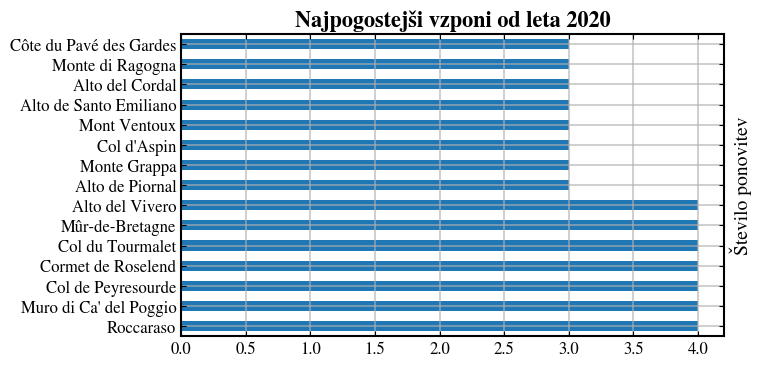

In [219]:
data_frame = pd.read_csv("../data/csv/climbs.csv")

filtered_data_frame = data_frame[data_frame["Year"] >= 2020]

climb_count = filtered_data_frame["Name"].value_counts().head(15)

climb_count.plot(kind="barh")
plt.ylabel("Število ponovitev")

ax = plt.gca()
ax.yaxis.set_label_position("right")

plt.title("Najpogostejši vzponi od leta 2020")

Na sliki je prikazanih 15 najpogostejših vzponov od leta 2020. Med vzponi zasledimo par legendarnih vzponov, kot so Col du Tourmalet, Mont Ventoux, Mote Grappa, ... Seveda, pa tukaj ne pričakujemo, tistih najhujših vzponov.

Za nadaljno analizo, bomo ob nadmorski višini cilja (označeni z Vertical v tabeli), potrebovali tudi oceno višine, ki jo kolesarji premagajo. Ker imamo povprečni naklon $\overline{\tan \varphi}$ in dolžino $L$, ocenimo višino z $\delta h = \overline{\tan \varphi} L$. Tukaj predpostavimo, da je integral za povprečni naklon, tj. $L^{-1} \int_0^L \tan \varphi (x) \, d x$, dobro ocenjen. Po pretvorbi dolžine v metere dobimo

In [220]:
data_frame["DeltaVertical"] = data_frame["Steepness"] * data_frame["Length"] * 10
data_frame.sort_values("DeltaVertical", ascending=False).head(10)

,Name,Length,Steepness,Vertical,Year,Race,DeltaVertical
3,Passo dello Stelvio/Stilfserjoch,24.8,7.4,2746,2020,giro-d-italia,1835.2
614,Val Thorens,33.4,5.4,2363,2019,tour-de-france,1803.6
853,Col de la Loze,28.3,6.0,2300,2023,tour-de-france,1698.0
990,Col de la Loze - Souvenir Henri Desgrange,26.5,6.4,2275,2025,tour-de-france,1696.0
235,Colle delle Finestre,18.4,9.2,2149,2025,giro-d-italia,1692.8
667,Col de la Loze,21.4,7.7,2302,2020,tour-de-france,1647.8
924,Cime de la Bonette,23.1,6.8,2798,2024,tour-de-france,1570.8
396,Sierra Nevada,19.4,7.9,2499,2022,vuelta-a-espana,1532.6
792,Col de la Croix de Fer,29.1,5.2,2068,2022,tour-de-france,1513.2
992,Col de la Madeleine,19.3,7.8,1984,2025,tour-de-france,1505.4


Sedaj si poglejmo porazdelitev števila vzponov glede na leto.

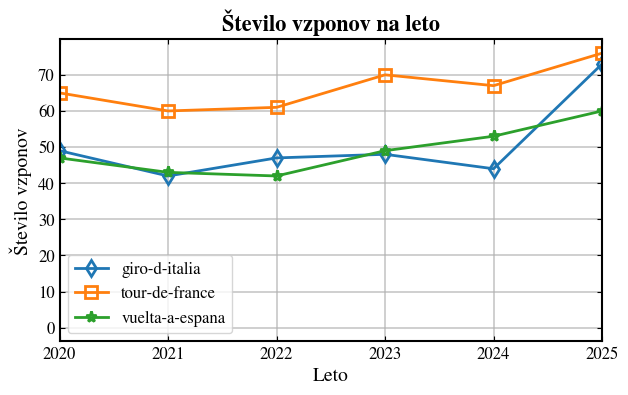

In [221]:
graph_climbs_by_year = data_frame.groupby(["Race", "Year"]).size()

count_table = graph_climbs_by_year.unstack(fill_value=0) 

for i, race in enumerate(count_table.index):
    plt.plot(count_table.columns, count_table.loc[race], label=f"{race}", marker=markers_iter[i])

plt.xlim([2020, 2025])
plt.title("Število vzponov na leto")
plt.xlabel("Leto")
plt.ylabel("Število vzponov")
plt.legend()
plt.show()

Opazimo, da imajo direke podobno število vzponov, vseeno pa izstopa dirka po Franciji. To ni nujno odvisno le od resničnega števila vzponov, temveč tudi klasifikacije vzponov. Če so vzponi prekratki se vzpona enostavno ne šteje, klasifikacija takšni vzponov pa je prepuščena organizatorju dirke. Sicer pa je dirka po Španiji znano pa tem da ima manj vzponov, vendar več težjih vzponov. Prvo dejstvo opazimo tudi na grafu. 

Ker število vzponov zagotovo ni edino merilo o zahtevnosti etap, si je smiselno pogeldati tudi povprečno višino in dolžino vzponov.

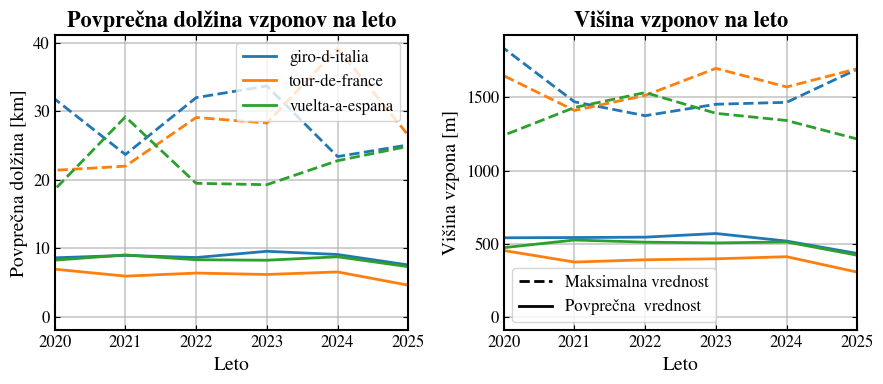

In [222]:
invalid_condition = data_frame["Vertical"] != 0
groups = ["Year", "Race"]

graph_climb_length_by_year = data_frame[invalid_condition].groupby(groups)["Length"].mean().unstack(fill_value=0)
graph_climb_max_length_by_year = data_frame[invalid_condition].groupby(groups)["Length"].max().unstack(fill_value=0)

graph_climb_height_by_year = data_frame[invalid_condition].groupby(groups)["DeltaVertical"].mean().unstack(fill_value=0)
graph_climb_max_height_by_year = data_frame[invalid_condition].groupby(groups)["DeltaVertical"].max().unstack(fill_value=0)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

for race_name in graph_climb_length_by_year:
    p1 = ax[0].plot(graph_climb_length_by_year.index, graph_climb_length_by_year[race_name], label=race_name, marker="none")
    colour =  p1[0].get_color()


    ax[0].plot(graph_climb_max_length_by_year.index, graph_climb_max_length_by_year[race_name], linestyle="--", marker="none", color = colour)
    ax[1].plot(graph_climb_height_by_year.index, graph_climb_height_by_year[race_name], marker="none", color = colour)
    ax[1].plot(graph_climb_max_height_by_year.index, graph_climb_max_height_by_year[race_name], marker="none", linestyle="--", color = colour)

ax[0].set_title("Povprečna dolžina vzponov na leto")
ax[0].set_ylabel("Povprečna dolžina [km]")

ax[1].set_title("Višina vzponov na leto")
ax[1].set_ylabel("Višina vzpona [m]")

legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', marker="None", label='Maksimalna vrednost'),
    Line2D([0], [0], color='black', linestyle='-', marker="None", label='Povprečna  vrednost')
]

ax[0].legend()
ax[1].legend(handles=legend_elements)

for i in range(0,2):
    ax[i].set_xlim([2020, 2025])
    ax[i].set_xlabel("Leto")

fig.set_tight_layout(True)
plt.show()

Opazimo, da so odstopanja med leti zelo majhna. Do odstopanj pride le glede na dirke. Dirka po Franciji ima povprečno malenkost krajše vzpone, kar je v skladu s tem, da jih ima enostavno več kot drugi dve dirki. Tukaj bi bilo zanimivo videti, koliko vzponov je povprečno (glede na leto) visokogorskih, torej takih, ki so višji od $1500$ m. Na take etape se namreč kolesarji pripravljajo nekoliko drugače, več o tem kasneje.

Text(0.5, 0.98, 'Vzponi nad 1500 m od leta 2020')

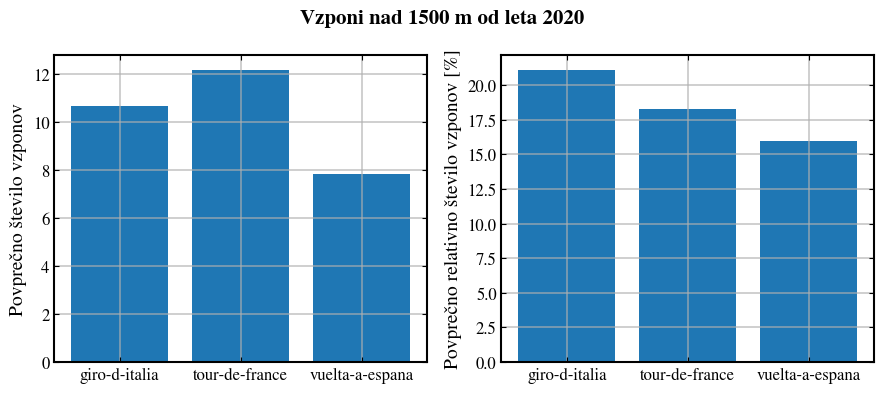

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

high_climbs_per_year = filtered_data_frame[(filtered_data_frame["Vertical"] > 1500)].groupby("Race").size()

climbs_after_2020 = filtered_data_frame.groupby("Race").size()

ax[0].bar(high_climbs_per_year.index, high_climbs_per_year.values / 6)

ax[0].set_ylabel("Povprečno število vzponov")

ax[1].bar(high_climbs_per_year.index, high_climbs_per_year.values / climbs_after_2020 * 100)

ax[1].set_ylabel("Povprečno relativno število vzponov [%]")

fig.set_tight_layout(True)
fig.suptitle("Vzponi nad 1500 m od leta 2020")


Na levi sliki opazimo, da ima dirka po Franciji največ visokogorskih vzponov med dirkami. Na desni sliki pa, da ima dirka po Italiji najvišji delež visokogorskih vzponov.

Kot zadnje merilo pa si poglejmo še naklon vzponov. Dirka po Španiji je recimo znana kot dirka, ki ima kratke a izjemno strme vzpone. To se odraža predvsem v naklon, kjer lahko kolesarji pogosto pričakujejo tudi nad 20% naklon na delih vzponov. Sprva si poglejmo tabelo naklonov soritrano po najvišjem povprečnem naklonu

In [224]:
data_frame.sort_values("Steepness", ascending=False).drop_duplicates(subset="Name").head(15)

,Name,Length,Steepness,Vertical,Year,Race,DeltaVertical
351,Mirador de Ézaro,1.8,14.2,268,2020,vuelta-a-espana,255.6
391,Puerto Collado de Ballesteros,2.9,13.4,1410,2021,vuelta-a-espana,388.6
432,Les Praeres,3.8,12.9,742,2022,vuelta-a-espana,490.2
296,Muro di Ca' del Poggio,1.0,12.2,244,2025,giro-d-italia,122.0
664,Côte de Mutigny,0.9,12.2,0,2019,tour-de-france,109.8
481,Xorret de Catí,3.8,11.4,1088,2023,vuelta-a-espana,433.2
167,Monte Lussari,7.8,11.2,1744,2023,giro-d-italia,873.6
697,Montée du plateau des Glières,6.0,11.2,1392,2020,tour-de-france,672.0
851,Côte de Pulventeux,0.8,10.9,341,2022,tour-de-france,87.2
647,Mur d'Aurec-sur-Loire,3.2,10.8,0,2019,tour-de-france,345.6


Nobenega presenčenja ni, da so prvi trije najstrmejši vzponi na dirk po Španiji. Zagotovo pa presenti dejstvo, da ima dirka po Franciji največ vzponov med najstrmejšimi. Pričakovali bi, da tudi ta "naslov" pripada Španiji. 

Preden zaključimo z analizo naklonov, pa si poglejmo še, kako nakloni padajo z dolžino vzpona.

C:\Users\zigav\AppData\Local\Temp\ipykernel_140624\808479151.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  max_indices = length_frame.groupby(categories)['Steepness'].idxmax()
C:\Users\zigav\AppData\Local\Temp\ipykernel_140624\808479151.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means_list = data_frame.groupby(categories_mean)['Steepness'].mean().tolist()


Text(0.5, 1.0, 'Povprečni naklon glede na dolžino')

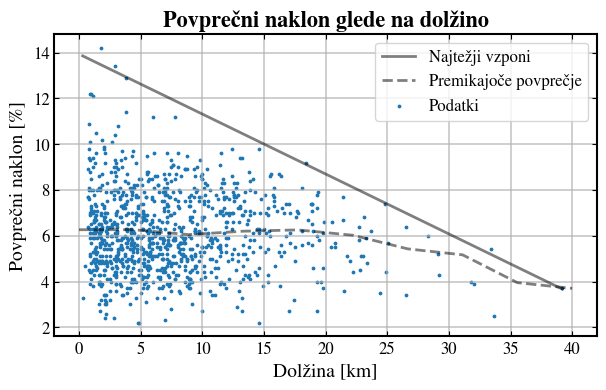

In [225]:
length_frame = data_frame[data_frame["Length"] != 0].drop_duplicates(subset=["Name", "Length"])

length = length_frame["Length"]
stepness =  length_frame["Steepness"]


x_fit_max = np.linspace(0, 40, 8)

x_fit_mean = np.linspace(0, 40, 10)

categories = pd.cut(length_frame['Length'], bins=x_fit_max, include_lowest=False)

max_indices = length_frame.groupby(categories)['Steepness'].idxmax()

categories_mean = pd.cut(length_frame['Length'], bins=x_fit_mean, include_lowest=False)

means_list = data_frame.groupby(categories_mean)['Steepness'].mean().tolist()
means_list.insert(0, means_list[0])

coefficients = np.polyfit(length[max_indices], stepness[max_indices], 1)  
polynomial = np.poly1d(coefficients)


x_fit = np.linspace(min(length), max(length), 100)
y_fit = polynomial(x_fit)

plt.plot(x_fit, y_fit, marker="none", color="black", linestyle="solid", alpha=0.5, label="Najtežji vzponi")

plt.plot(x_fit_mean, means_list, marker="none", color="black", linestyle="dashed", alpha=0.5, label="Premikajoče povprečje")

plt.scatter(length, stepness, s=3, label="Podatki")

plt.legend()

plt.xlabel("Dolžina [km]")
plt.ylabel("Povprečni naklon [%]")
plt.title("Povprečni naklon glede na dolžino")

Opazimo, da se povprečni naklon z dolžino vzpona počasi zamnjšuje, kar je pričakovano. 

#### Težavnost vzponov ####
Do sedaj se nismo preveč osredotočali na smiselnost metrik za ocenjevanje vzponov. Seveda sta tako dolžina kot naklon pomembni, ampak težko pa s tem primerjamo vzpone med seboj. Poglejmo primer; če ima vzpon $20 \%$ naklon in je dolg $1$ km, zagotovo ni tako težek kot vzpon, ki je dolg $10$ km in ima $8\%$ naklon. Vzpone zato karakteriziramo po težavnosti. Za metriko lahko vzamemo recimo [**ASO**](https://www.rouleur.cc/blogs/the-rouleur-journal/how-are-the-tour-de-france-climbs-classified) formulo $$S = L G^2, $$ kjer je $L$ dolžina vzpona in $G$ povprečni naklon. Ta formula se lahko uporablja za določitev težavnostnih točk na dirki po Franciji. Klasifikacija pa je sledeča:
- $S > 600$ - hors catégorie (ne klasificirano),
- $600 \ge S > 300$ - 1. kategorija
- $300 \ge S > 150$ - 2. kategorija
- $150 \ge S > 75$ - 3. kategorija
- $75 \ge S > 0$ - 4. kategorija.

Višji kot je $S$, težji je vzpon. Za primerjavo pa vzamimo formulo, ki je bila določena z regresijskim modelom na sledeči [povezavi](https://www.scienceofpeloton.com/p/judging-climbing-stage-difficulty): 
$$ S = G + L + S + \frac{G}{L}, $$
kjer je $S$ nadomorska višina najvišje točke vzpona.

Sprva si poglejmo najtežje vzpone glede na obe metriki.

In [227]:
# Izbriši iste vzpone, ki se znova pojavijo
data_climbs = data_frame.drop_duplicates(subset=["Name", "Length"])

stepness = data_frame['Steepness']
length = data_frame['Length']
vertical = data_frame['Vertical']

stepness_non_zero = stepness != 0
length_non_zero = length != 0
vertical_non_zero = vertical != 0

data_frame["AOC score"] = round(stepness ** 2 * length, 1)
data_frame["Regression score"] = round(stepness + length + vertical/1000 + stepness / length, 1)

data_climbs[stepness_non_zero & length_non_zero & vertical_non_zero].sort_values("AOC score", ascending=False).head(10)

C:\Users\zigav\AppData\Local\Temp\ipykernel_140624\1659953073.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_climbs[stepness_non_zero & length_non_zero & vertical_non_zero].sort_values("AOC score", ascending=False).head(10)


,Name,Length,Steepness,Vertical,Year,Race,DeltaVertical,AOC score,Regression score
235,Colle delle Finestre,18.4,9.2,2149,2025,giro-d-italia,1692.8,1557.4,30.2
355,Altu d'El Gamoniteiru,14.6,9.8,1762,2021,vuelta-a-espana,1430.8,1402.2,26.8
3,Passo dello Stelvio/Stilfserjoch,24.8,7.4,2746,2020,giro-d-italia,1835.2,1358.0,35.2
667,Col de la Loze,21.4,7.7,2302,2020,tour-de-france,1647.8,1268.8,31.8
613,Col du Portet,16.2,8.7,2206,2018,tour-de-france,1409.4,1226.2,27.6
735,Col du Portet,16.4,8.6,2209,2021,tour-de-france,1410.4,1212.9,27.7
396,Sierra Nevada,19.4,7.9,2499,2022,vuelta-a-espana,1532.6,1210.8,30.2
546,L'Angliru - Cima Alberto Fernández,12.4,9.8,1569,2025,vuelta-a-espana,1215.2,1190.9,24.6
190,Monte Grappa,18.1,8.1,1671,2024,giro-d-italia,1466.1,1187.5,28.3
995,Mont Ventoux,15.6,8.7,1831,2025,tour-de-france,1357.2,1180.8,26.7


In [ ]:
data_climbs[stepness_non_zero & length_non_zero & vertical_non_zero].sort_values("Regression score", ascending=False).drop_duplicates(subset=["Name", "Length"]).head(10)

Opazimo, da sta metriki precej različni. Sploh glede na to, da vzpona z najvišjim AOC seštevkom sploh ni med najboljših 10 po regresijsekm seštevku. Očitna razlika je že to, da so vzponi, ki so daljši, tudi veliko burtalnejši po regresijskem modelu.

Vprašamo se pa lahko tudi o porazdeltivi vzponov glede na metriki.

Text(0.5, 0.98, 'Porazdelitev točk glede na vzpone')

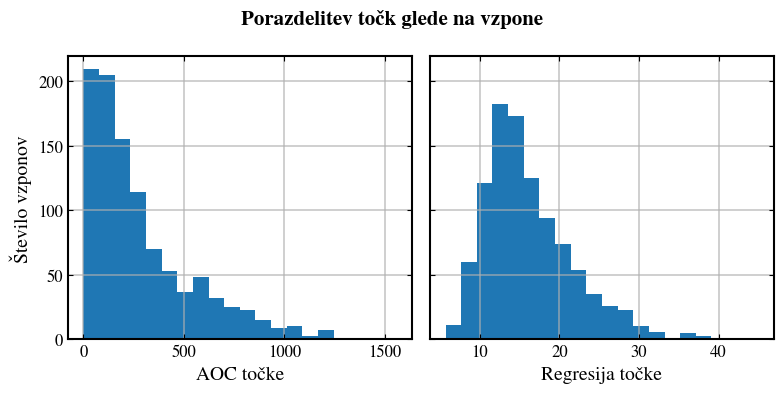

In [230]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

data_climbs['AOC score'].plot(ax=ax[0], kind="hist" , bins=20)
data_climbs['Regression score'].plot(ax=ax[1], kind="hist" , bins=20)

ax[0].set_xlabel("AOC točke")

ax[0].set_ylabel("Število vzponov")
ax[1].set_xlabel("Regresija točke")

fig.set_tight_layout(True)
fig.suptitle("Porazdelitev točk glede na vzpone")


Opazimo, da sta porazdelitvi malo drugačni. AOC porazdelitev je koncentrirana pri manjših vrednostih, medtem ko je regiresijska porazdelitev bolj enakomerna. To je pričakovano, tudi glede na že prej postavljeno lestvico. AOC porazdelitev je mišljena kot komulativna, kjer težavnost vzponov s številom AOC točk narašča.


Poglejmo si še, kako se težavnost vzponov spreminja glede na dirko.

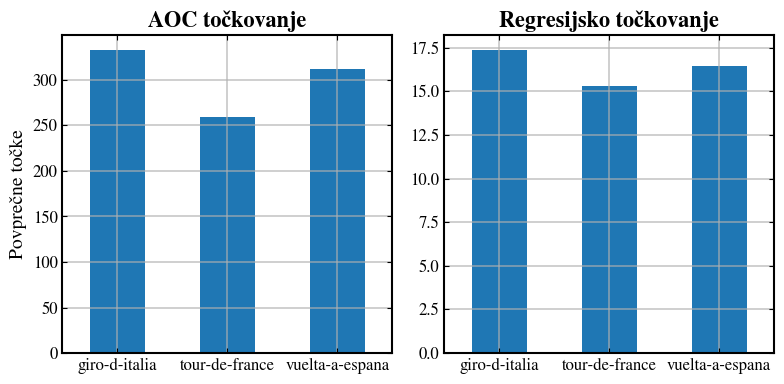

In [229]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

filtered_data_frame = data_frame[data_frame["Year"] >= 2020]

filtered_data_frame.groupby("Race")["AOC score"].mean().plot(kind="bar", ax=ax[0])
filtered_data_frame.groupby("Race")["Regression score"].mean().plot(kind="bar", ax=ax[1])

for i in range(0, 2):
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=0, ha='center') 
    ax[i].set_xlabel("")
ax[0].set_ylabel("Povprečne točke")

ax[0].set_title("AOC točkovanje")
ax[1].set_title("Regresijsko točkovanje")
fig.set_tight_layout(True)

Obe metriki nakazujeta, da so vzponi na dirki po Italiji najtežji, na dirki po Franciji pa najlažji. To je verjetno pogojeno z dejstvom, da je vzponov na dirki po Franciji enostavno več. Zato bi bila bolj smiselna neka relativna metrika.

Za zaključek pa poglejmo še povprečno kategorijo vzponov na posamezni dirki

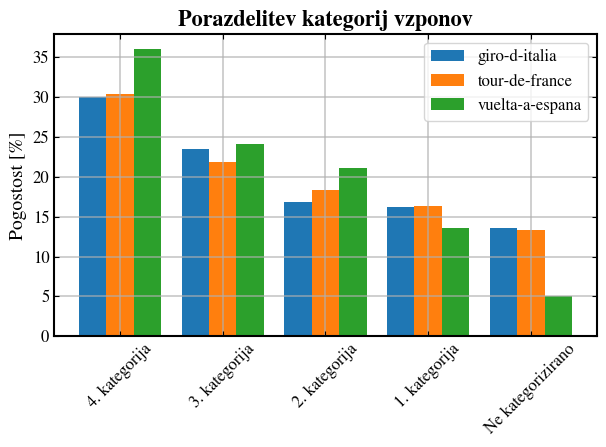

: 

In [ ]:

bins = [0, 75, 150, 300, 600, 2000]
labels = ['4. kategorija', '3. kategorija', '2. kategorija', '1. kategorija', 'Ne kategorizirano']


grouped_by_race = filtered_data_frame.groupby("Race")

width = 0.8 / 3

for i, [race, group_df] in enumerate(grouped_by_race):

    cut = pd.cut(group_df['AOC score'], bins=bins, labels=labels, right=False)

    value_counts = cut.value_counts(normalize=True) * 100

    x = np.arange(len(bins) - 1)

    plt.bar(x + 2 * i * width / 2, value_counts, width, label=race)

    plt.xticks(x + 2* width / 2, labels, rotation=45)

plt.ylabel("Pogostost [%]")
plt.title("Porazdelitev kategorij vzponov")
plt.legend()


Medtem ko sta si dirka po Franciji in dirka po Italiji dokaj podobni po porazdelitvi vzponov, ima dirka po Španiji veliko manj zelo težkih vzponov.

## Zaključek ##

V tej projektni nalogi smo analizirali nekaj lastnosti največjih kolesarskih dirk. Preučili smo splošne lastnosti dirk, kot so recimo dolžina dirke, število etap, opravljena nadmorska višina, ..., posvetili smo se tudi analizi vzponov, ki pravzaprav krojijo posmezno dirko in jo naredijo unikatno. Analiza je potrdila nekaj splošno sprejetih dejstev, kot recimo, da so na dirki po Španiji nastrmejši vzponi. Pokazala je, da med temi trotedenskimi dirkami obstajajo razlike. Posledično je tudi izbira dirke za posmeznega kolesarja ključna. To se najbolj održava v tem, da si kolesarji v eni sezoni izberejo dve od treh največjih dirk in se glede na izbiro pripravljajo na drugačen način. Na primer, ko se kolesarji pripravljajo na dirko po Italiji, opravijo daljše priprave na visoki nadmorski višini, ker imajo tam, kot smo pokazali, (relativno) največ vzponov nad $1500$ metrov.
